In [2]:
%matplotlib widget
import matplotlib.pyplot as plt
from astropy.table import Table
from ipywidgets import Button, Layout, jslink, IntText, IntSlider, interactive, interact, HBox, Layout, VBox
import ipywidgets as widgets


cat = Table.read("/Users/Vincent/Nextcloud/LAM/FIREBALL/LAM-Transfer/Thermal/FlightPrincipalCatalog_Final_V4_11122018.csv")

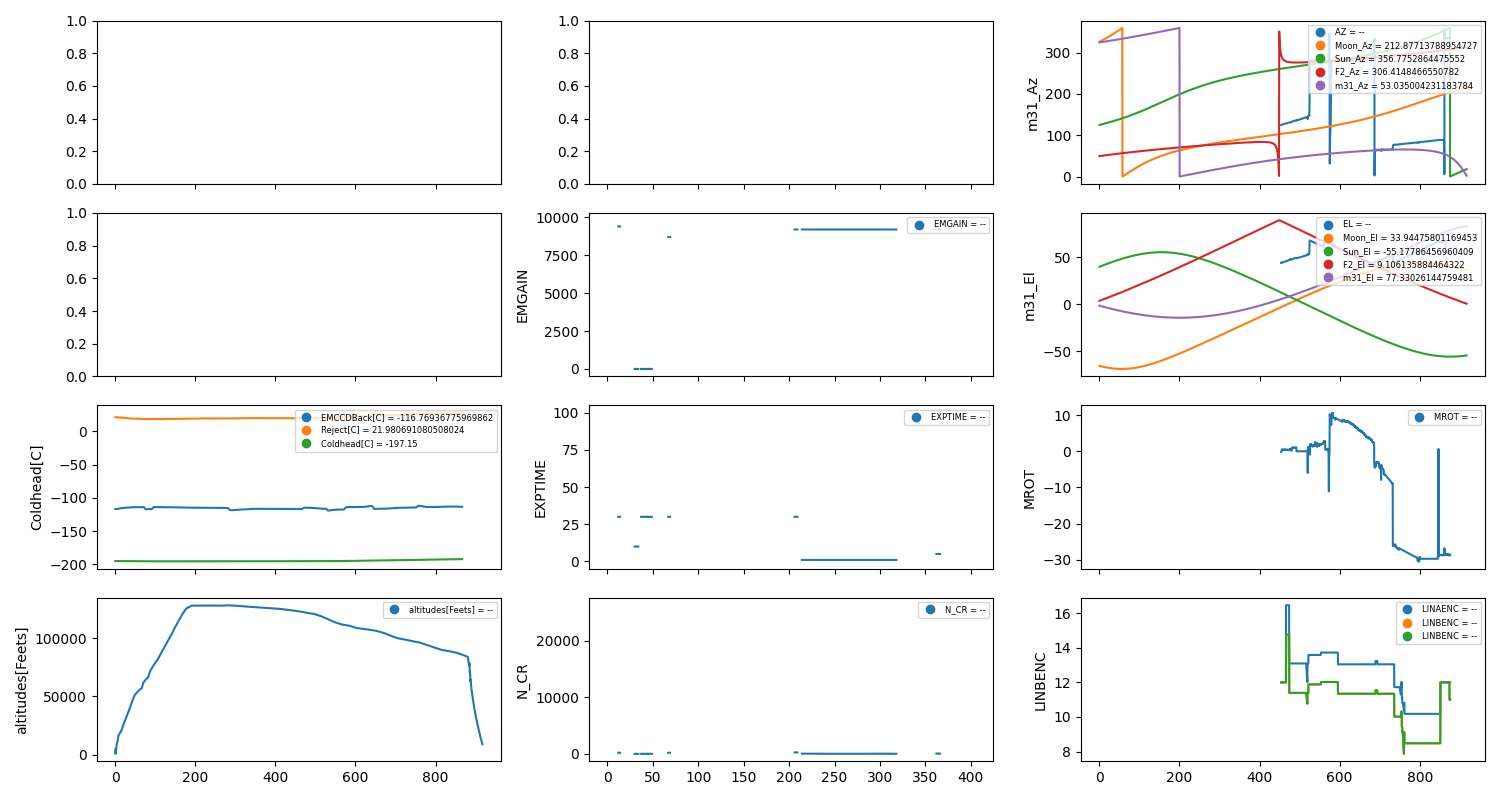

In [15]:


x = "SECONDS_TU"
x = "Mins after launch"

def add_line(cat,y,ax,i=1000, x=x, init=True,l=None):
    if init:
        l1 = ax.plot(cat[x],cat[y])
        # if np.isnan(cat[y][i]):
        # ax.plot(cat[x][i],cat[y][i],"o",label=y + " = %0.1e"%(cat[y][i]))
        l = ax.plot(cat[x][i],cat[y][i],"o",label=y + " = %s"%(cat[y][i]),c=l1[0].get_color())
        # ax.set_xlabel(x)
        ax.set_ylabel(y)
    else:
        l[0].set_ydata(cat[y][i])
        l[0].set_label(y + " = %s"%(cat[y][i]))
    ax.legend(loc="upper right",fontsize=6)
    return l



style={}#{'description_width': 'initial'} 
width = '400px'
continuous_update=True




class dashboard(widgets.HBox):
     
    def __init__(self,cat=cat):
        super().__init__()
        self.output = widgets.Output()
        
        # self.ax1bis = self.ax1.twinx()

        self.fig, self.axes = plt.subplots(4,3, figsize=(15,8),sharex="col")
        # (self.a0,self.a1,self.a2,self.a3) = self.axes
        a0, a1, a2, a3 = self.axes
        self.la200 = add_line(cat,"EMCCDBack[C]",ax=a2[0],)
        self.la201 = add_line(cat,"Reject[C]",ax=a2[0],)
        self.la202 = add_line(cat,"Coldhead[C]",ax=a2[0])
        self.la30 = add_line(cat,"altitudes[Feets]",ax=a3[0])
        self.la310 = add_line(cat,"N_CR",ax=a3[1],x="IMNO")#/exptime
        self.la21 = add_line(cat,"EXPTIME",ax=a2[1],x="IMNO")
        self.la11 = add_line(cat,"EMGAIN",ax=a1[1],x="IMNO")
        self.la320 = add_line(cat,"LINAENC",ax=a3[2])
        self.la321 = add_line(cat,"LINBENC",ax=a3[2])
        self.la322 = add_line(cat,"LINBENC",ax=a3[2])
        self.la020 = add_line(cat,"AZ",ax=a0[2])
        self.la021 = add_line(cat,"Moon_Az",ax=a0[2])
        self.la022 = add_line(cat,"Sun_Az",ax=a0[2])
        self.la023 = add_line(cat,"F2_Az",ax=a0[2])
        self.la024 = add_line(cat,"m31_Az",ax=a0[2])
        self.la120 = add_line(cat,"EL",ax=a1[2])
        self.la121 = add_line(cat,"Moon_El",ax=a1[2])
        self.la122 = add_line(cat,"Sun_El",ax=a1[2])
        self.la123 = add_line(cat,"F2_El",ax=a1[2])
        self.la124 = add_line(cat,"m31_El",ax=a1[2])
        self.la22 = add_line(cat,"MROT",ax=a2[2])
        self.fig.tight_layout()
        self.t = widgets.IntSlider( min=0, max=len(cat),value=0, style = style, layout=Layout(width=width),description='t',continuous_update=continuous_update,tooltip="t")
#         self.RN = widgets.IntSlider( min=0, max=120,value=RN, style = style, layout=Layout(width=width),description='Read noise',continuous_update=continuous_update,tooltip="EMCCD readout noise in electrons")
#         self.CIC_charge = widgets.FloatSlider( min=0, max=0.05,value=CIC_charge,style = style, layout=Layout(width=width),description='CIC charge',step=0.001,readout_format='.3f',continuous_update=continuous_update,tooltip="EMCCD spurious charges due to amplification in electrons")
#         self.Dard_current = widgets.FloatSlider( min=0, max=2,value=Dard_current, style = style, layout=Layout(width=width),description='Dard current',step=0.0011,readout_format='.2f',continuous_update=continuous_update,tooltip="Dark current of the EMCCD in electrons per hour")
#         self.readout_time = widgets.FloatSlider( min=0, max=20,value=readout_time, style = style, layout=Layout(width=width),description=r'RO time (s)',step=0.1,continuous_update=continuous_update,tooltip="Readout time of the EMCCD controller in seconds")
#         self.x_axis=widgets.Dropdown(options=["Spectra 1538p477","Spectra 1821p643",'Spectra 0044p030',"Spectra mrk509","Spectra 2344p092","Spectra 1637p574","Spectra 1115p080","Spectra 0414m060","Spectra 0115p027","Spectra 2251p113","Spectra 2201p315","Spectra 1928p738","Spectra 1700p518",'fesc=10%, slit=100mu, w=204','fesc= 1%, slit=100mu, w=204','Spectra m=7','Spectra m=10','Spectra m=12','Spectra m=14','Spectra m=15','Spectra m=15','Spectra m=16','Spectra m=17','Spectra m=17.5','Spectra m=18','Spectra m=19','Spectra m=20','Spectra m=22','Spectra m=24','fesc=10%, slit= 50mu, w=204','fesc= 1%, slit= 50mu, w=204','fesc=10%, slit=300mu, w=204','fesc= 1%, slit=300mu, w=204','fesc=10%, slit=100mu, w=200','fesc=10%, slit= 50mu, w=200','fesc=10%, slit=300mu, w=200','fesc=10%, slit=100mu, w=208','fesc=10%, slit= 50mu, w=208','fesc=10%, slit=300mu, w=208'], layout=Layout(width='350px'),description='Entry',value=x_axis)


#         self.fwhm = widgets.FloatRangeSlider( min=0.1, max=6,value=(PSF_RMS_mask,PSF_RMS_det),style = style, layout=Layout(width=width),description='Mask/det σ',step=0.1,readout_format='.1f',tooltip="Spatial resolution in arcseconds respectively at the mask and detector level. To be multiplied by 2.35 to have the FWHM.")
#         self.QE = widgets.FloatSlider( min=0, max=1,value=new.QE,style = style, layout=Layout(width=width),description='QE',step=0.01,readout_format='.2f',tooltip="EMCCD quantum efficiency in percents")
#         self.guider_noise = widgets.FloatSlider( min=0, max=3,value=guider_noise,style = style, layout=Layout(width=width),description='Guider noise',step=0.2,readout_format='.1f',tooltip="Guider induced background level in electrons per hour")

#         self.counting_mode = widgets.Checkbox(value=counting_mode,description='Counting',disabled=False,tooltip="Check this box to apply thresholding photon counting processing. The efficiency of this process is determined by the gain, read noise, smearing, flux.",layout=Layout(width="187px"))


        
#         self.threshold = widgets.FloatSlider( min=-1.1, max=30.1,value=5.5, style = style, layout=Layout(width="347px"),description='Threshold',continuous_update=continuous_update,readout_format='.1f',step=0.1,tooltip="Threshold (n) used when photon counting mode: T=bias+nσ.")
#         self.threshold.layout.visibility ='hidden'
#         self.smearing = widgets.FloatSlider( min=0, max=2,value=smearing, layout=Layout(width=width),description='Smearing',step=0.01,continuous_update=continuous_update)#'$t_{aq}$ (h)') #widgets.Dropdown(options=[0.2,0.7,1.2],value=0.7,description='Smearing (pix)')      
# # 
        wids = widgets.interactive(self.update,t=self.t)
        controls = VBox([HBox([self.t])] )
        display(HBox([self.output,controls]))

        


    def update(self,t ):
        """Draw line in plot"""


        with self.output:
            a0, a1, a2, a3 = self.axes

            # self.fig.axes[2].relim()
            # self.fig.axes[2].autoscale_view()
            # self.ax1bis.relim()
            # self.ax1bis.autoscale_view()

            add_line(cat,"EMCCDBack[C]",ax=a2[0],i=t, init=False,l= self.la200)
            add_line(cat,"Reject[C]",ax=a2[0],i=t, init=False, l=self.la201)
            add_line(cat,"Coldhead[C]",ax=a2[0],i=t, init=False, l=self.la202)
            add_line(cat,"altitudes[Feets]",ax=a3[0],i=t, init=False, l=self.la30 )
            add_line(cat,"N_CR",ax=a3[1],i=t, init=False, l=self.la310)
            add_line(cat,"EXPTIME",ax=a2[1],i=t, init=False, l=self.la21 )
            add_line(cat,"EMGAIN",ax=a1[1],i=t, init=False, l=self.la11 )
            add_line(cat,"LINAENC",ax=a3[2],i=t, init=False, l=self.la320)
            add_line(cat,"LINBENC",ax=a3[2],i=t, init=False, l=self.la321)
            add_line(cat,"LINBENC",ax=a3[2],i=t, init=False, l=self.la322)
            add_line(cat,"AZ",ax=a0[2],i=t, init=False, l=self.la020)
            add_line(cat,"Moon_Az",ax=a0[2],i=t, init=False, l=self.la021)
            add_line(cat,"Sun_Az",ax=a0[2],i=t, init=False, l=self.la022)
            add_line(cat,"F2_Az",ax=a0[2],i=t, init=False, l=self.la023)
            add_line(cat,"m31_Az",ax=a0[2],i=t, init=False, l=self.la024)
            add_line(cat,"EL",ax=a1[2],i=t, init=False, l=self.la120)
            add_line(cat,"Moon_El",ax=a1[2],i=t, init=False, l=self.la121)
            add_line(cat,"Sun_El",ax=a1[2],i=t, init=False, l=self.la122)
            add_line(cat,"F2_El",ax=a1[2],i=t, init=False, l=self.la123)
            add_line(cat,"m31_El",ax=a1[2],i=t, init=False, l=self.la124)
            add_line(cat,"MROT",ax=a2[2],i=t, init=False, l=self.la22 )
            self.fig.canvas.draw()
            # fitswrite(self.im, "/tmp/test_%s.fits"%(fwhm[1]))

d = dashboard(cat)


Todo:
- mettre les consignes
- pourvoir changer l'axe des absice
- pouvoir decocher certaines cibles et certaines temperatures pour ameliroer la lisibilité
- mettee un traceur en focntion de t

In [6]:
cat[0]["mi"]

DATE_TU,SECONDS_TU,Mins after launch,altitudes[Feets],VERSION,IMGTAG,EXPOSURE,FRAMESTA,FRAMEEND,IMGCOUNT,ROTENC,LINAENC,LINBENC,LINCENC,RA_DTU,DEC_DTU,ROLL_DTU,AZ,EL,MROT,CCDTEMP,CAMTEMP,PWSTEMP,TRTD,PRESSURE,VALID0,USE0,TX0,TY0,CX0,CY0,FLUX0,SIGMAX0,SIGMAY0,VALID1,USE1,TX1,TY1,CX1,CY1,FLUX1,SIGMAX1,SIGMAY1,VALID2,USE2,TX2,TY2,CX2,CY2,FLUX2,SIGMAX2,SIGMAY2,VALID3,USE3,TX3,TY3,CX3,CY3,FLUX3,SIGMAX3,SIGMAY3,VALID4,USE4,TX4,TY4,CX4,CY4,FLUX4,SIGMAX4,SIGMAY4,VALID5,USE5,TX5,TY5,CX5,CY5,FLUX5,SIGMAX5,SIGMAY5,VALID6,USE6,TX6,TY6,CX6,CY6,FLUX6,SIGMAX6,SIGMAY6,VALID7,USE7,TX7,TY7,CX7,CY7,FLUX7,SIGMAX7,SIGMAY7,MaxCoolerPower[W],MinCoolerPower[W],CommandCoolerPower[W],CuClamp1[C],Getter[C],CuClamp2[C],bot-tank-lks[C],top-tank-lks[C],EMCCDBack[C],Reject[C],Coldhead[C],DOBC-PV[C],Water-Temp-bot[C],MUX-Temp[C],Water-Temp-top[C]TBC,Water-Temp-bot-pt100[C],waterpress1,waterpress2,Dewar-Cover,Temp Air Ext,Temp Air Int,Siderostat Mirror Verif,Medium bench Verif,Detector Mount Verif,CNES Sphere Plancher GA Verif,CNES Sphere Intermediaire Gauche TBC,CNES Pump - Cold Water,CNES Structure top left,CNES Roues a Inertie,CNES Batt Bloc Gauche,CNES Batt Bloc Droite,CNES Sphere Plancher DR,CNES Plancher AR (face int),CNES Sphere Intermediaire Gauche,CNES Sphere Haute AV Gauche,CNES Lower Tank Verif,CNES Upper Tank Verif,BRD-VM_30MS_1-TM-MISSION1-Batterie,Moon_El,Moon_Az,Sun_El,Sun_Az,F2_El,F2_Az,m31_El,m31_Az,DETNAME,EXPTIME,EMGAIN,PREAMP,VSS,IMNO,IMBURST,TEMP,N_CR,MEANHIGH,STDHIGH,SKEWHIGH,MEANLOW,STDLOW,SKEWLOW,Date_s_detector,Action/Note,C_bias,C_sigR0,C_flost,C_EGAIN,C_BIAS,C_SIGR0,C_FLOST,BRD_GPS_126_TM_DEBUG_GPSLATITUDE,BRD_GPS_126_TM_DEBUG_GPSLONGITUDE,BRD_GPS_126_TM_OPER_ALTITUDE,BRD_GPS_126_TM_OPER_GPSHSPEED,BRD_VM_30MS_1_TM_DEBUG1_AscDvEstDtu,BRD_VM_30MS_1_TM_DEBUG1_AscDvEstGuider,BRD_VM_30MS_1_TM_DEBUG1_AscDvEstNac,BRD_VM_30MS_1_TM_DEBUG1_DecDvEstDtu,BRD_VM_30MS_1_TM_DEBUG1_DecDvEstGuider,BRD_VM_30MS_1_TM_DEBUG1_DecDvEstNac,BRD_VM_30MS_1_TM_PERF_PositionRot,Transmission_at_zenith,Transmission_at_elevation,Pressure_model_from_altitude,C_EGAIN_median,C_BIAS_median,C_OVERSCANN_MEAN,C_OS_CORRECTED_90p,C_FLUX_COUNTS_PER_HOUR_90p,C_FLUX_COUNTS_PER_HOUR_50p,C_FLUX_COUNTS_PER_HOUR_10p,C_FLUX_COUNTS_PER_HOUR_1p,C_FLUX_COUNTS_PER_HOUR_99p
str19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str160,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2018-09-22T00:00:23,1537567223.7386935,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,-